### Leetcode 89. Gray Code
* Overview 
  + An n-bit gray code sequence is a sequence of 2n integers where:
    + Every integer is in the inclusive range `[0, 2n - 1]`,
    + The first integer is 0,
    + An integer appears no more than once in the sequence,
    + The binary representation of every pair of adjacent integers differs by exactly one bit, and
    + The binary representation of the first and last integers differs by exactly one bit.
  + Given an integer n, return any valid n-bit gray code sequence.
  
* Algorithm (DP)
  + the basic logic is that if there exists a set of numbers that differ by one bit, then adding 1 to the highest bit of these numbers in reversed order will generate another set of numbers that differ by one bit
  + staring from 0, we construct a number differ by one bit from 0 using 0 | 1 << 0, which is 1
  + now we have (0, 1), if we add 1 bit to the highest bit of 1 and 0, we get (00, 01, 11, 10)
  + the logic is that when we add the highest 1 to `dp[i]`, we are sure the new number differ from `dp[i]` by exactly one bit, then we add the highest 1 to `dp[i-1]`, since we `dp[i-1]` and `dp[i]` differs by one bit, we know the two new numbers will differ by one bit 
  + why use reversed(dp)? 
    + This can make sure the first number obtained in each for loop when adding one bit will have exactly one bit difference from its previous number. for example when switch from 01 to 11 where the highest 1 is added to 01 and 00, we need to make sure the switch between 01 and 11 is good. We know 11 and 10 will be OK since 01 and 00 is OK. On the other hand, if we don't use the reversed dp, then (00, 01, 10, 11) will have problem when switching from 01 to 10 where there both first and second positions are different and we have two bit difference.
* Time and space complexity
  + time complexity O(2^n) 
  + space complexity O(2^n)
  + since for a give n, there will be 2^n numbers. So we have to generate these numbers using 2^n operations and store them using 2^n space

In [7]:
from typing import List
class Solution:
    def grayCode(self, n: int) -> List[int]:
        
        # initialize dp as [0]
        # if n == 0, then result = [0]
        dp = [0]

        # add 1 bit to the highest bit position
        # starting from the largest index to make sure
        # the first number in for loop obtained has exactly
        # one bit difference from its previous number. All
        # numbers in each for loop will differ in one bit 
        # since they differ in one bit before adding the
        # highest 1 bit 
        for i in range(n):
            dp = dp + [x | 1 << i for x in reversed(dp)]

        return dp    

### Leetcode 39 Combination Sum
* Overview
  + Given an array of distinct integers candidates and a target integer target, return a list of all unique combinations of candidates where the chosen numbers sum to target. You may return the combinations in any order.
  + The same number may be chosen from candidates an unlimited number of times. Two combinations are unique if the frequency of at least one of the chosen numbers is different.
  + The test cases are generated such that the number of unique combinations that sum up to target is less than 150 combinations for the given input.
  
* Algorithm (backtracking)
  + sort the candidate list
  + define dfs function to traverse the list index, `curr_sum` and `inter_rs`
  + if `curr_sum` == 0, add `inter_rs` to rs
  + traverse i from index to len(candidates)-1, if candidates(index) > `curr_sum`, break out of the loop. We sort candidate list to reduce the impossible dfs tries
  + otherwise, recursively call dfs(i, `curr_sum - candidates[i]`, `inter_rs=[candidates[i]]`)
  
* time space O(N^(T/M)+1)
  + the recursive is like a nry-tree, the total number of nodes is O(N^(h)) where n is the number of children for each node
  + (T/M) + 1 is the depth of the tree. For each layer, we try O(N) recursive calls
* space complexity O(T/M)
  + we call depth of T/M

In [2]:
from typing import List
class Solution:
    def combinationSum(self, candidates: List[int], target: int) -> List[List[int]]:
        if not candidates or target == 0:
            return []

        rs = []        
        candidates.sort()
        def find_comb(index: int, curr_sum: int, inter_rs) -> None:
            
            if curr_sum == 0:
                rs.append(inter_rs)
                return
            
            for i in range(index, len(candidates)):
                if candidates[i] > curr_sum:
                    break
                  
                find_comb(i, curr_sum - candidates[i], inter_rs + [candidates[i]]) 
                
        find_comb(0, target, [])  

        return rs                

### 1249. Minimum Remove to Make Valid Parentheses
* Given a string s of '(' , ')' and lowercase English characters.
* Your task is to remove the minimum number of parentheses ( '(' or ')', in any positions ) so that the resulting parentheses string is valid and return any valid string.
* Formally, a parentheses string is valid if and only if:
  + It is the empty string, contains only lowercase characters, or
  + It can be written as AB (A concatenated with B), where A and B are valid strings, or
  + It can be written as (A), where A is a valid string.
* Algorithm
  + use double scans, one from left to right to remove extra ), and the other scan from right to left to remove extra (. 
    + set balance = 0, increment balance by 1 when ( or ) occurs for left and right scans, respectively
    + decrement balance by 1 when the opposite parathesis occurs if balance > 0, otherwise, skip to output the opposite parathesis
    + for all other characters, output to result
    
  + use double scan. Both from left to right
  + set `total_left` and balance for the first scan from left to right. Increment both `total_left` and balance when ) occurs, and skip ) when balance == 0 to remove extra )
  + if balance == 0 after the first scan, we have balanced expression, output it
  + otherwise, scan from left to right, and only keep the ( when `keep_left = total_left - balance > 0`. Otherwise, skip the (. For all other cases, output the characters  

In [ ]:
# double scan in the same direction
class Solution:
    def minRemoveToMakeValid(self, s: str) -> str:
        if not s:
            return s

        left_pass = []

        # record the balance and total number of (
        balance = 0
        total_left = 0

        for c in s:
            # increment balance and total_left for each (
            if c == "(":
                balance += 1
                total_left += 1               
            # when a ) has left parathesis to balance, 
            # decrease the balance. Otherwise, skip the )
            elif c == ")":
                if balance == 0:
                    continue
                else:
                    balance -= 1
            left_pass.append(c)

        # we have deleted all extra ), if balance == 0, we don't
        # have excess (, so we have a valid expression to return
        if balance == 0: 
            return "".join(left_pass)   

        # otherwise, calculate the number of ( to keep and
        # give the priority to ( at the starting side of the 
        # left_pass list. Once left_keep == 0, skip the (
        left_keep = total_left - balance
        rs = ""
        for c in left_pass:
            if c == "(":
                if left_keep == 0:
                    continue
                else:
                    left_keep -=1
            rs += c
        return rs     
    
    
# double scans at opposite directions
class Solution:
    def minRemoveToMakeValid(self, s: str) -> str:
        if not s:
            return s

        left_pass = []
        balance = 0

        for c in s:
            if c == "(":
                balance += 1
            elif c == ")":
                if balance == 0:
                    continue
                else:
                    balance -= 1
            left_pass.append(c)

        balance = 0
        rs = []
        for i in range(len(left_pass)-1, -1, -1):
            if left_pass[i] == ")":
                balance += 1
            elif left_pass[i] == "(":
                if balance == 0:
                    continue
                else:
                    balance -= 1
            rs.append(left_pass[i])

        return "".join(rs[::-1])             

### 449. Serialize and Deserialize BST


In [ ]:
# Definition for a binary tree node.
# class TreeNode:
#     def __init__(self, x):
#         self.val = x
#         self.left = None
#         self.right = None

class Codec:

    def serialize(self, root: Optional[TreeNode]) -> str:
        """Encodes a tree to a single string.
        """
        if root is None:
            return ""

        # only visit not None TreeNodes and concatenate
        # the preorder traversal values as strings
        def traverse(node: TreeNode) -> str:
            
            # no need to consider None Tree nodes
            rs = str(node.val)

            if node.left:
                rs += " " + traverse(node.left)
            if node.right:
                rs += " " + traverse(node.right)

            return rs

        return traverse(root).strip()


    def deserialize(self, data: str) -> Optional[TreeNode]:
        """Decodes your encoded data to tree.
        """

        if not data:
            return None

        # get the list of TreeNode values
        nodes = list(map(int, data.split(" ")))
        
        def parse(start: int, end: int) -> Optional[TreeNode]:
            
            # build TreeNodes depending on start and end indexes
            if start > end:
                return None

            if start == end:
                return TreeNode(nodes[start])    

            # build root TreeNode
            root_val = nodes[start]
            root = TreeNode(root_val)

            end_index = start
            start += 1

            # find the end index of the left child, if exist. Otherwise
            # use the start index, which will return a None TreeNode by parse()
            while end_index + 1 <= end and nodes[end_index+1] < root_val:
                end_index += 1           

            root.left = parse(start, end_index)
            root.right = parse(end_index+1, end)
            
            return root         
            
        return parse(0, len(nodes) - 1)          

        

# Your Codec object will be instantiated and called as such:
# Your Codec object will be instantiated and called as such:
# ser = Codec()
# deser = Codec()
# tree = ser.serialize(root)
# ans = deser.deserialize(tree)
# return ans

### 71. Simplify Path
* Overview
  + Given a string path, which is an absolute path (starting with a slash '/') to a file or directory in a Unix-style file system, convert it to the simplified canonical path.
  + In a Unix-style file system, a period '.' refers to the current directory, a double period '..' refers to the directory up a level, and any multiple consecutive slashes (i.e. '//') are treated as a single slash '/'. For this problem, any other format of periods such as '...' are treated as file/directory names.
  + The canonical path should have the following format:
    + The path starts with a single slash '/'.
    + Any two directories are separated by a single slash '/'.
    + The path does not end with a trailing '/'.
    + The path only contains the directories on the path from the root directory to the target file or directory (i.e., no period '.' or double period '..')
    + Return the simplified canonical path.
    
* Algorithm
  + split the input string using re.split("/+") to consider // or mutlitple / as one separator
  + to remove dots
    + if it is a single dot, continue. The same if p == "" since /abc is separated to "" and "abc", we need to ignore ""
    + if it is a double dot, check if stack is not empty, pop the stack. Otherwise, we are already in root directory, so ignore it
  + for other characters, push to stack
  + if stack is empty, return /. Otherwise, return "/" +"/".join(stack)    

In [ ]:
class Solution:
    def simplifyPath(self, path: str) -> str:
        # empty string corresponds to root directory
        if not path:
            return "/"

        # initialize stack and root folder
        s = []
        root = "/"

        # traverse each parsed component as parsed by / or 
        # multiple /. Note p might be empty string as 
        # the result of parsing the first / of root
        for p in re.split("/+", path):
            # if p == "." or p == "", ignor it
            if not p or p == ".":
                continue
            
            # if p == "..", if s, pop the current folder
            # Otherwise, we are already in root, ignore it
            elif p == "..":
                if s:
                    s.pop()
            # for other symbols, we treat them as folder names
            # and push them in the stack
            else:
                s.append(p)

        # if stack is empty, output root, otherwise, output
        # the folder structure separated by /
        return root + "/".join(s) if s else root                

### 79. Word Search
* Overview
  + Given an m x n grid of characters board and a string word, return true if word exists in the grid.
  + The word can be constructed from letters of sequentially adjacent cells, where adjacent cells are horizontally or vertically neighboring. The same letter cell may not be used more than once.
  
* Algorithm
  + dfs to check the next char until match to index n-1 of input word  

In [2]:
from typing import List, Optional
class Solution:
    def exist(self, board: List[List[str]], word: str) -> bool:
        
        if not board or not word:
            return False    

        m, n = len(board), len(board[0])
        moves = [(0, 1), (0, -1), (1, 0), (-1, 0)]
        word_length = len(word)

        def dfs(index: int, i: int, j: int) -> bool:
            if index == word_length - 1:
                return True

            char = board[i][j]
            board[i][j] = "#"

            for move in moves:
                x = i + move[0]
                y = j + move[1]

                if -1 < x < m and -1 < y < n and word[index + 1] == board[x][y]:
                    if dfs(index + 1, x, y):
                        return True

            board[i][j] = char
            return False

        for i in range(m):
            for j in range(n):
                if board[i][j] == word[0]:
                    if dfs(0, i, j):
                        return True
        return False                        

### 82. Remove Duplicates from Sorted List II
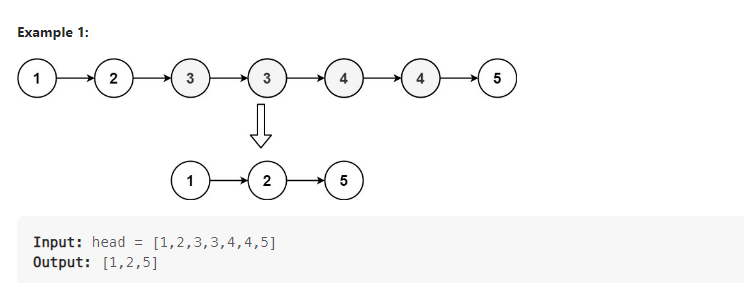

In [5]:
from typing import List, Optional

# Definition for singly-linked list.
class ListNode:
    def __init__(self, val=0, next=None):
        self.val = val
        self.next = next
class Solution:
    def deleteDuplicates(self, head: Optional[ListNode]) -> Optional[ListNode]:
        if head is None or head.next is None:
            return head

        # set up dummy node since the head node may be deleted
        dummy = ListNode()
        dummy.next = head

        # set curr to dummy to traverse the linked list
        curr = dummy

        # check curr.next before moving curr to curr.next
        # only after confirming curr.next is not a duplicated value, 
        # move curr to curr.next. Only advance curr in else clause
        while curr.next:
            if curr.next.next and curr.next.val == curr.next.next.val:
                value = curr.next.val
                while curr.next and curr.next.val == value:
                    curr.next = curr.next.next                
            else:
                curr = curr.next        
            

        return dummy.next          

### 90. Subsets II
* Overview
  + Given an integer array nums that may contain duplicates, return all possible subsets (the power set).
  + The solution set must not contain duplicate subsets. Return the solution in any order.

In [ ]:
class Solution:
    def subsetsWithDup(self, nums: List[int]) -> List[List[int]]:
        if not nums:
            return []

        # sort the nums array
        nums.sort()
        n = len(nums)

        rs = []

        def dfs(index: int, inter_rs: List[int]) -> None:
            
            # first append the inter_rs to the rs 
            rs.append(inter_rs)

            # traverse from index to n, and check duplicates
            for i in range(index, n):
                if i > index and nums[i] == nums[i-1]:
                    continue
                
                # USE i + 1, NOT index + 1 !!!
                dfs(i + 1, inter_rs + [nums[i]])  

        dfs(0, [])
        return rs

### 57. Insert Interval
* Overview
You are given an array of non-overlapping intervals intervals where `intervals[i] = [starti, endi]` represent the start and the end of the ith interval and intervals is sorted in ascending order by starti. You are also given an interval newInterval = `[start, end]` that represents the start and end of another interval.
  + Insert newInterval into intervals such that intervals is still sorted in ascending order by starti and intervals still does not have any overlapping intervals (merge overlapping intervals if necessary).
  + Return intervals after the insertion.
* Algorithm
  + use binary search to find the index position to insert the newInterval based on the start values of the intervals
  + if the start value is found, we find an existing inteval with the same start value, this interval is the insertion point
  + Otherwise, return the interval index with the first start value > target (start value of newInterval)
  + then check if the interval before the insertion index has end element overlapping with the newInterval, if so, extend this interval to cover newInterval without insertion
  + Otherwise, insert the newInteval at the insertion index
  + set up `next_index = insert_index + 1`
  + while `next_index < len(intervals) and intervals[insert_index][1] >= intervals[next_index][0]`, extend insert interval to cover the next index interval, and pop the next index interval. The interval after the next index will fill in and start the next iteration in the while loop

In [ ]:
class Solution:
    def insert(self, intervals: List[List[int]], newInterval: List[int]) -> List[List[int]]:
        # if not interval, return list with newInterval
        if not intervals:
            return [newInterval]
            
        # if no intervals to insert, return intervals
        if not newInterval:    
            return intervals

        # consider edge cases to add newInterval to
        # either sides of the intervals
        if newInterval[1] < intervals[0][0]:
            return [newInterval] + intervals

        if newInterval[0] > intervals[-1][1]:
            return intervals + [newInterval]

        # apply binary search to find the index
        # of the newInterval based on start element
        start = 0
        end = len(intervals) - 1
        target = newInterval[0]
        insert_index = -1

        while start <= end:
            mid = start + (end - start) // 2
            if intervals[mid][0] == target:
                insert_index = mid
                break
            elif intervals[mid][0] > target:
                end = mid - 1
            elif intervals[mid][0] < target:
                start = mid + 1

        # if no start value is found, get the insertion point
        # as the interval with begin value > target
        if insert_index == -1:
            insert_index = start

        # check if the insert_index -1 is the right one to insert by checking its end element
        # with target, if there is an overlap, insert newInterval without createing new intervals
        if insert_index > 0 and (intervals[insert_index - 1][1] >= target):
            intervals[insert_index - 1][1] = max(intervals[insert_index-1][1], newInterval[1])
            insert_index -= 1
        # otherwise, insert the newInterval to the insert_index
        else:
            intervals.insert(insert_index, newInterval)

        # in a while loop check overlap between next_index interval with the insertion point interval, 
        # if an overlap is found, extend the insert_interval, and pop the next_index interval
        # the next interval after the next_index will fill in to next_index for the next iteration
        next_index = insert_index +  1
        while next_index < len(intervals) and intervals[next_index][0] <= intervals[insert_index][1]:
            intervals[insert_index][1] = max(intervals[insert_index][1], intervals[next_index][1])
            intervals.pop(next_index)   

        return intervals                                 

### 128. Longest Consecutive Sequence
* Overview
  + Given an unsorted array of integers nums, return the length of the longest consecutive elements sequence.
  + You must write an algorithm that runs in O(n) time.
* Algorithm
  + the while loop will be triggered when a starting element of a subsequence is traversed. In the entire for loop, the while loop will only run for at most n time, no matter how many subsequences are contained. Therefore, the total run time is the sum of outer and inner loops, rather than the product of them. The time complexity is at most 2N, which is O(N)
  + space complexity is O(N)

In [ ]:
class Solution:
    def longestConsecutive(self, nums: List[int]) -> int:
        if not nums:
            return 0

        # store all nums in a set
        s = set(nums)
        rs = 1

        # traverse the set to find the starting element
        # for every potential sub sequences
        for num in s:
            # find the starting element for every potential sub sequence
            if num - 1 not in s:
                curr = num
                seq_len = 1
                
                # then increase the subsequence if element exists
                while curr + 1 in s:
                    curr += 1
                    seq_len += 1
                    
                    rs = max(rs, seq_len)

        return rs               

### 159. Longest Substring with At Most Two Distinct Characters
* Overview
  + Given a string s, return the length of the longest substring that contains at most two distinct characters.

In [ ]:
class Solution:
    def lengthOfLongestSubstringTwoDistinct(self, s: str) -> int:
        if len(s) < 3:
            return len(s)

        # define the start and end indexes of the sliding window
        start, end = 0, 0

        # define the word_dict to store the count of characters
        word_dict = defaultdict(int)

        # define the number of unique characters
        unique = 0
        rs = 0

        # apply sliding window template
        while end < len(s):

            # expand the right edge
            end_ele = s[end]

            # increment unique elements when first occurance 
            # of a character occurs
            if word_dict[end_ele] == 0:
                unique += 1
            # increment the element count    
            word_dict[end_ele] += 1

            # contract left edge when unique > 2
            while start <= end and unique > 2:
                start_ele = s[start]
                # update unique if applicable when contrast left edge
                if word_dict[start_ele] == 1:
                    unique -= 1

                # decrement the word_dict count
                word_dict[start_ele] -= 1
                # contrast the left edge of the window
                start += 1

            # check if the condition fulfill, update rs
            if start <= end and unique < 3:
                rs = max(rs, end - start + 1)

            # expand right edge
            end += 1

        return rs     